In [35]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

Task 1

a)


In [54]:
def generate_data(n=500):
  Z = np.random.binomial(n=1, p=0.3, size=n)
  X = Z * np.random.normal(1, 1, n) + (1-Z) * np.random.normal(5, 2, n)
  return X.reshape(-1, 1)

In [55]:
X = generate_data()

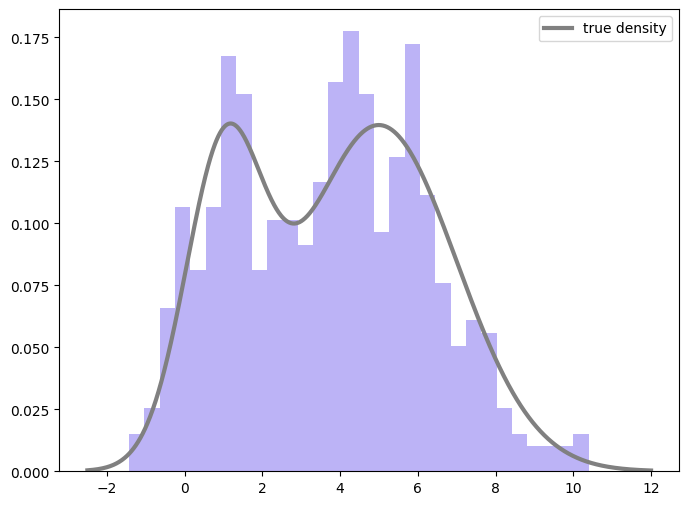

In [60]:
mu0 = 1
mu1 = 5
sigma0 = 1
sigma1 = 2
pi0 = 0.3
pi1 = 0.7

x = np.linspace(-2.5, 12, 1000)[:, np.newaxis]
true_dens = pi0 * norm(mu0, sigma0).pdf(x[:, 0]) + pi1 * norm(mu1, sigma1).pdf(x[:, 0])

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(X, bins=30, color='mediumslateblue', alpha=0.5, density=True)
ax.plot(x[:, 0], true_dens, color="gray", lw=3, label='true density')
plt.legend()
plt.show()

b)
$$
\text{loglikelihood} = \sum_{i=1}^{n} log (p(x_{i}, G_{i}=g_{i}|\theta)) \\
p(x_{i}| G_{i}=0,\theta) = f_{N(\mu_0, \sigma_0)}(x_i)\\
p(x_{i}| G_{i}=1,\theta) = f_{N(\mu_1, \sigma_1)}(x_i)\\
p(x_{i}| G_{i}=g_i,\theta) = (1-g_i)f_{N(\mu_0, \sigma_0)}(x_i) + g_i f_{N(\mu_1, \sigma_1)}(x_i) \\
\text{loglikelihood} = \sum_{i=1}^{n} log (p(x_{i}, G_{i}=g_{i}|\theta)) = \sum_{i=1}^{n} log (p(x_{i}| G_{i}=g_{i}, \theta) \cdot p(G_i=g_i|\theta)) = \\
= \sum_{i=1}^{n} (1-g_i) log f_{N(\mu_0, \sigma_0)}(x_i) + g_i log f_{N(\mu_1, \sigma_1)}(x_i) \\
= (1-g_i)log \pi_0 + g_i log \pi_1 \\
$$

c)
$$
\gamma = E(G_i|x_i, \theta) = p(G_i=1 | x_i=0) = \frac{p(x_i| G_i=1, \theta)p(G_i=1|\theta)}{p(x_i|\theta)} = \\
= \frac{f_{N(\mu_1, \sigma_1)}(x_i) \cdot \pi_1}{\pi_0 \cdot f_{N(\mu_0, \sigma_0)}(x_i) + \pi_1 \cdot f_{N(\mu_1, \sigma_1)}(x_i)} \\
\hat{\gamma} = \frac{f_{N(\hat{\mu_1}, \hat{\sigma_1})}(x_i) \cdot \hat{\pi_1}}{\hat{\pi_0} \cdot f_{N(\hat{\mu_0}, \hat{\sigma_0})}(x_i) + \hat{\pi_1} \cdot f_{N(|\hat{\mu_1}, \hat{\sigma_1})}(x_i)}
$$
hat for E-step

d)
$$
\text{loglik} = \sum_{i=1}^{n} (1 - \gamma_i) (log f_{N(\mu_0, \sigma_0)}(x_i) + log \pi_0) + \sum_{i=1}^{n} \gamma_i (log f_{N(\mu_1, \sigma_1)}(x_i) + log \pi_1) \\
\sigma_0^2 (MLE) \text{      loglik} \propto \sum_{i=1}^{n} (1 - \gamma_i) log f_{N(\mu_0, \sigma_0)}(x_i) = \\
= \sum_{i=1}^{n} (1 - \gamma_i) log \frac{1}{\sqrt{2\pi\sigma_0^2}}exp(-\frac{1}{2} \frac{(x_i - \mu_0)^2}{\sigma_0^2}) \propto \\
\propto \sum_{i=1}^{n} (1 - \gamma_i) (-\frac{1}{2}log\sigma_0^2 - \frac{1}{2}\frac{(x_i - \mu_0)^2}{\sigma_0^2}) = h(\sigma_0^2) \\
h^{'}(\sigma_0^2) = \sum_{i=1}^{n} - (1 - \gamma_i)\frac{1}{2\sigma_0^2} + \frac{1-\gamma_i}{2}\frac{(x_i - \mu_0)^2}{\sigma_0^2}
$$

Algorithm EM

In [57]:
# number of iterations
n_it = 1000

# initial values
mu0_hat = 0
mu1_hat = 1
sigma0_hat = 1
sigma1_hat = 1
pi0_hat = 1/2
pi1_hat = 1/2

for i in range(n_it):
  # E
  gamma = (pi1_hat * norm(mu1_hat, sigma1_hat).pdf(X[:,0])) / (pi0_hat * norm(mu0_hat, sigma0_hat).pdf(X[:,0]) + pi1_hat * norm(mu1_hat, sigma1_hat).pdf(X[:,0]))
  # M
  mu0_hat = np.sum((1-gamma)*X[:,0]) / np.sum((1-gamma))
  mu1_hat = np.sum(gamma*X[:,0]) / np.sum(gamma)
  sigma0_hat = np.sqrt(np.sum((1-gamma)*(X[:,0] - mu0_hat)**2) / np.sum(1-gamma))
  sigma1_hat = np.sqrt(np.sum(gamma*(X[:,0] - mu1_hat)**2) / np.sum(gamma))
  pi0_hat = np.sum(1-gamma)/gamma.shape[0]
  pi1_hat = np.sum(gamma)/gamma.shape[0]

mu0_hat, mu1_hat, sigma0_hat, sigma1_hat, pi0_hat, pi1_hat

(0.7594420678490308,
 4.708161058759899,
 0.8813398021153674,
 2.0081605621063843,
 0.26147112311591914,
 0.738528876884081)

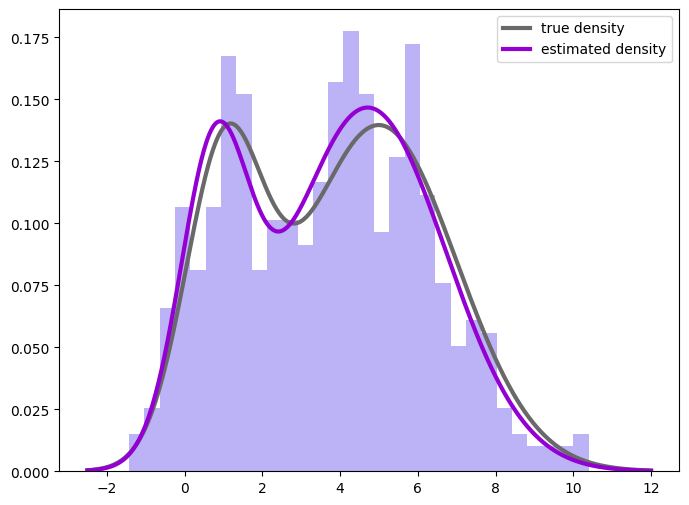

In [61]:
est_dens =  pi0_hat * norm(mu0_hat, sigma0_hat).pdf(x[:, 0]) + pi1_hat * norm(mu1_hat, sigma1_hat).pdf(x[:, 0])

fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(X, bins=30, color='mediumslateblue', alpha=0.5, density=True)
ax.plot(x[:, 0], true_dens, color="dimgrey", lw=3, label='true density')
ax.plot(x[:, 0], est_dens, color="darkviolet", lw=3, label='estimated density')
plt.legend()
plt.show()